In [4]:
import jedi.utils.noise_gen as noise
import matplotlib.pylab as plt
import numpy as np
from jedi.utils import plot
from jedi.utils import stats as cohen
import cPickle
import datetime
import scipy.stats as stats
import seaborn
import pandas as pd
import subprocess

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/Users/simonhaxby/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [9]:
    x = pd.DataFrame([[0.3,0.8,0.09,0.07],[-0.5,0.06,np.nan,np.nan]], columns=["Base" ,"Internal", "External", "Both"], index=["Flipflop", "Sine"])
x.replace(np.nan,'-', regex=True)

,Base,Internal,External,Both
Flipflop,0.30,0.80,0.09,0.07
Sine,-0.50,0.06,-,-


In [10]:
pdffile = 'out.pdf'
outname = 'out.png'
filename = 'out.tex'

template = r'''\documentclass[preview]{{standalone}}
\usepackage{{booktabs}}
\begin{{document}}
{}
\end{{document}}
'''

with open(filename, 'wb') as f:
    f.write(template.format(x.to_latex()))

subprocess.call(['pdflatex', filename])
subprocess.call(['convert', '-density', '300', pdffile, '-quality', '90', outname])

0

In [20]:
subprocess.call(['pdflatex', filename])
subprocess.call(['convert', '-density', '300', pdffile, '-quality', '90', outname])

0

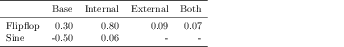

In [21]:
from wand.image import Image as WImage
img = WImage(filename='out.pdf')
img

In [22]:
ls ../data/stability/sin/both_noise

noise_exin_(0.1_0.3).p  noise_exin_(0.3_0.3).p  noise_exin_(0.4_0.3).p


In [148]:
ds = cPickle.load(open("../data/stability/sin/base/base.p", "rb"))

In [149]:
errors = np.array(ds['force'][0])
derrors = np.array(ds['dforce'][0])
params = ds['parameters']

tstart, tstop = params['tstart'], params['tstop']

In [ ]:
ierrors = np.array(ds['force'][0])
iderrors = np.array(ds['dforce'][0])
params = ds['parameters']

tstart, tstop = params['tstart'], params['tstop']

In [159]:
stats.levene?

In [160]:
print stats.levene(np.concatenate(errors), np.concatenate(ierrors))
print stats.levene(np.concatenate(derrors), np.concatenate(iderrors))

LeveneResult(statistic=273468.2312217541, pvalue=0.0)
LeveneResult(statistic=60741.694182359352, pvalue=0.0)


In [122]:
e = np.concatenate(errors[:])

In [123]:
e[1232]

-0.062482614024500283

In [134]:
len(derrors)

1000

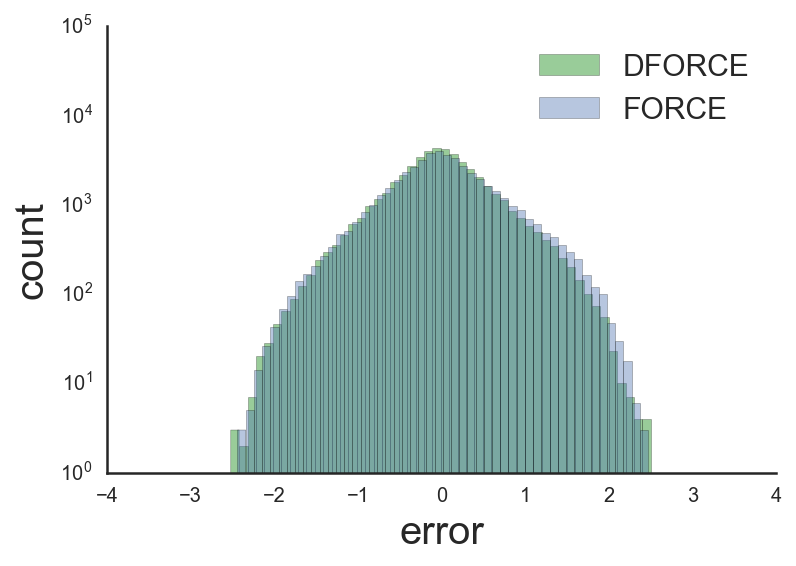

In [145]:
ax = seaborn.distplot(np.concatenate(derrors[:, 501:550]), color='g', kde=False, label='DFORCE')
ax = seaborn.distplot(np.concatenate(errors[:, 501:550]), kde=False, label='FORCE')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(1, 1e5)
ax.set_yscale('log')
ax.set_ylabel("count", fontsize=20)
ax.set_xlabel("error", fontsize=20)
ax.set_xlim(-4,4)
plt.legend(prop={'size':15})

(-4, 4)

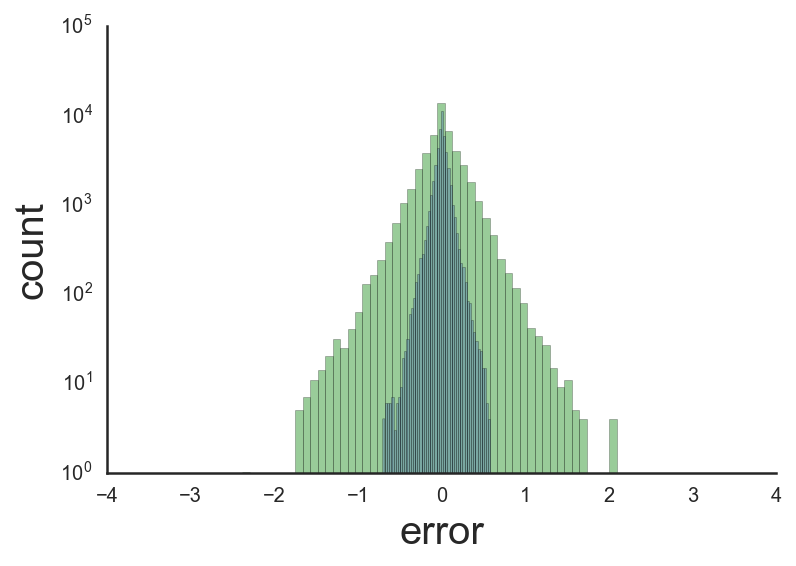

In [119]:

ax = seaborn.distplot(np.concatenate(derrors[:, 501:550]), color='g', kde=False)
ax = seaborn.distplot(np.concatenate(errors[:, 501:550]), kde=False)
ax.spines['right'].set_visible(False)
ax.set_yscale('log')
ax.spines['top'].set_visible(False)
ax.set_ylabel("count", fontsize=20)
ax.set_xlabel("error", fontsize=20)
ax.set_xlim(-4,4)

In [92]:
t = np.linspace(0,10,1002)
title = "meh"

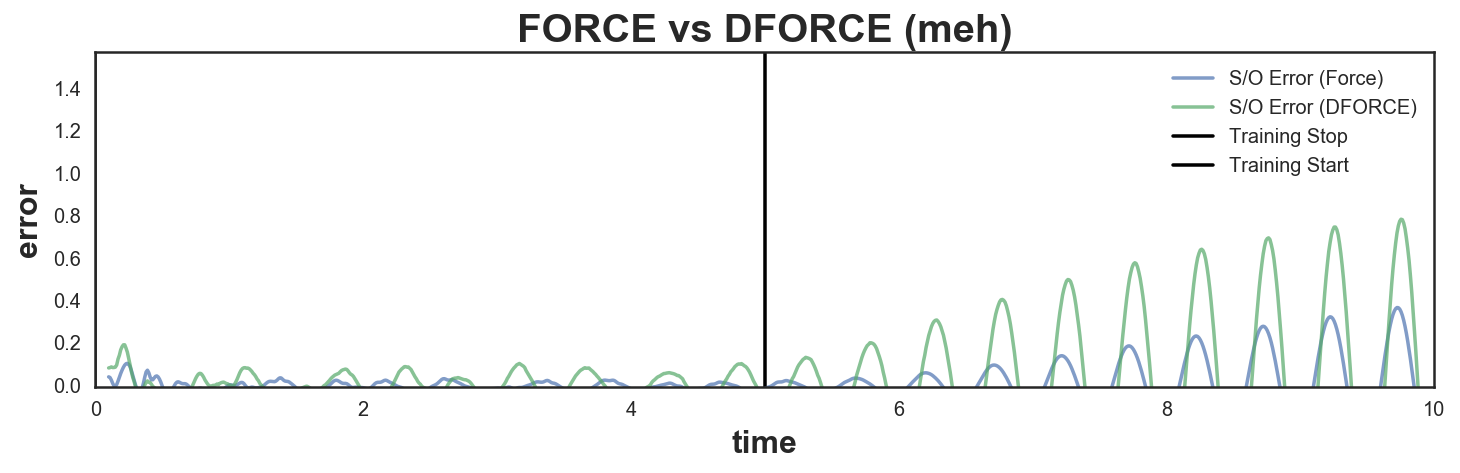

In [93]:
seaborn.set_style("white")
plt.figure(figsize=(12,3))
plot.cross_signal_error(errors, derrors, t, tstart, tstop,
                        title="FORCE vs DFORCE (%s)" % title, burn_in=10)

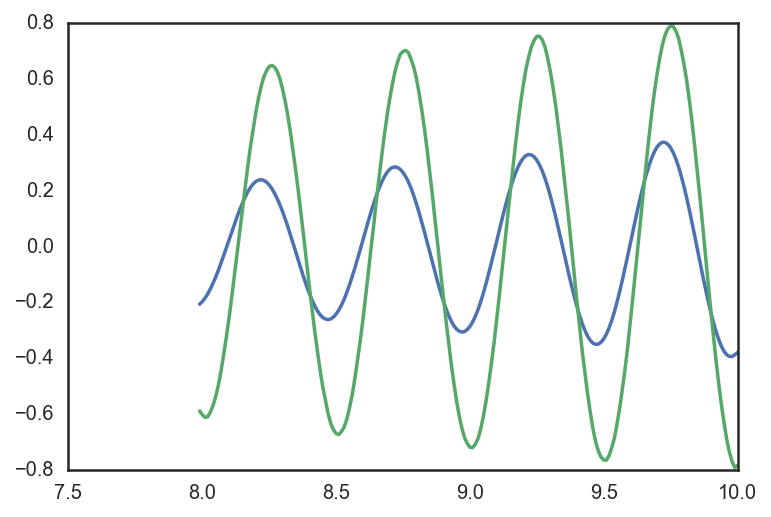

In [94]:
plt.plot(t[800:], np.mean(errors[:, 800:], 0))
plt.plot(t[800:], np.mean(derrors[:, 800:], 0))

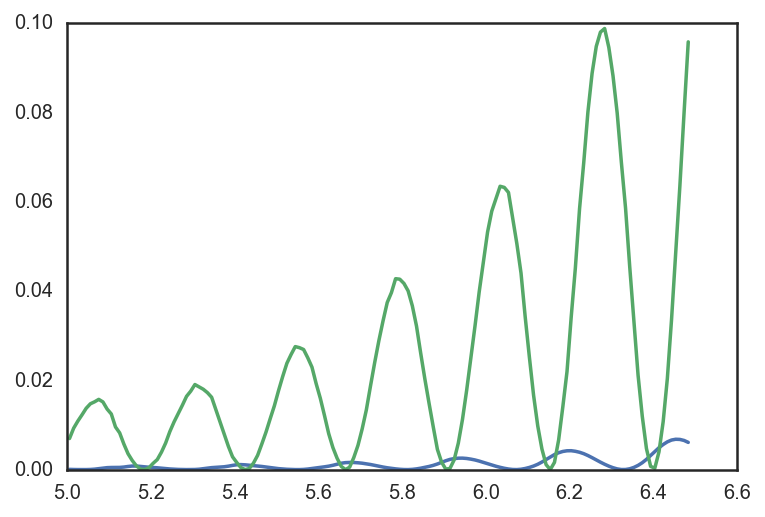

In [95]:
plt.plot(t[501:650], np.mean(errors[:, 501:650], 0)**2)
plt.plot(t[501:650], np.mean(derrors[:, 501:650], 0)**2)

{'tstart': 0, 't_count': 1002, 'tmax': 10, 'noise_var': 0.3, 'N': 300, 'sparsity': (0.1, 1, 1), 'lr': 1, 't': array([  0.00000000e+00,   1.00000000e-02,   2.00000000e-02, ...,
         9.99000000e+00,   1.00000000e+01,   1.00100000e+01]), 'rho': 1.02, 'pE': 0.8, 'tstop': 5, 'dt': 0.01}
FORCE --
Error mean: 0.2468
Error std: 0.6076

DFORCE --
Error mean: 0.1986
Error std: 0.4954

t-test: 3.19E-124
Cohen's d: 0.09


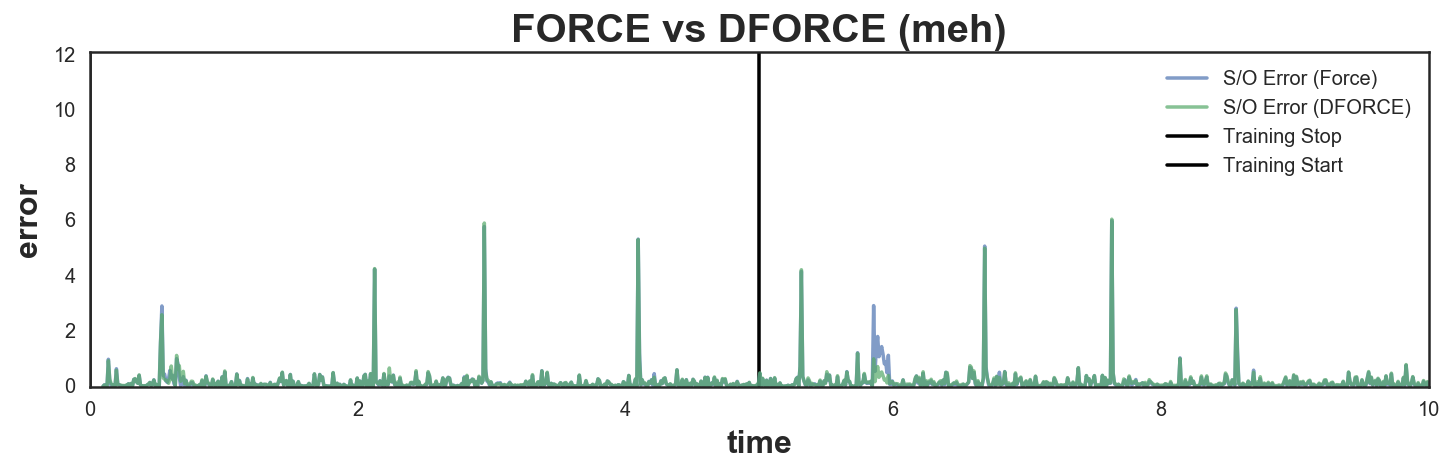

In [55]:
errors = np.array(ds['force'][0])**2
derrors = np.array(ds['dforce'][0])**2
params = ds['parameters']

tstart, tstop= params['tstart'], params['tstop']

ti = np.argmax(t > tstop)

post_train_e = errors[:, ti:650]
post_train_de = derrors[:, ti:650]

print params
print ("FORCE --")
print ("Error mean: %.4f" % np.mean(post_train_e ))
print ("Error std: %.4f\n" % np.std(post_train_e ))

print ("DFORCE --")
print ("Error mean: %.4f" % np.mean(post_train_de))
print ("Error std: %.4f\n" % np.std(post_train_de))

print("t-test: %.2E" %
      stats.ttest_ind(np.concatenate(post_train_e), np.concatenate(post_train_de), equal_var=False)[1])
print("Cohen's d: %.2f" % cohen.cohen_d(np.concatenate(post_train_e), np.concatenate(post_train_de)))

plt.figure(figsize=(12,3))
plot.cross_signal_error(errors, derrors, t, tstart, tstop,
                    title="FORCE vs DFORCE (%s)" % title, burn_in=10)

In [34]:
print "%.2E" % 2e-12

2.00E-12


In [ ]:
t = np.array([np.array([1,2,3]),
 np.array([2,3,4,])])**2

In [ ]:
t[:, 1:]